<h1 style = "font-family:'Arial Narrow';font-size:4rem;color:darkblue;">Weather Py</h1>

Python script to visualize the weather of over 500 cities of varying distances from the equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import json
from scipy.stats import linregress

In [2]:
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

<h2 style = "font-family:'Arial Narrow';font-size:2.5rem;color:Darkgrey;">Generate the Cities List by Using the "citipy" Library</h2>

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# print(json.dumps(cities, indent = 3, sort_keys = True))

Number of cities in the list: 578


<h2 style = "font-family:'Arial Narrow';font-size:2.5rem;color:Darkgrey;">Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude</h2>

In [4]:
# To fulfill the first requirement, you'll use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code. 

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url +  city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | newnham
Processing Record 3 of Set 1 | bafoulabe
Processing Record 4 of Set 1 | yaren
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | iskateley
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | vanimo
Processing Record 10 of Set 1 | melekeok village
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | cobija
Processing Record 15 of Set 1 | la ronge
Processing Record 16 of Set 1 | anadyr
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | borzna
Processing Record 22 of Set 1 | puerto natales
Processing Record 23 of S

Processing Record 39 of Set 4 | kouango
Processing Record 40 of Set 4 | okha
Processing Record 41 of Set 4 | ahau
City not found. Skipping...
Processing Record 42 of Set 4 | villa yapacani
Processing Record 43 of Set 4 | fort st. john
Processing Record 44 of Set 4 | kerikeri
Processing Record 45 of Set 4 | monchegorsk
Processing Record 46 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 47 of Set 4 | okhotsk
Processing Record 48 of Set 4 | fisterra
Processing Record 49 of Set 4 | lebu
Processing Record 0 of Set 5 | yabelo
Processing Record 1 of Set 5 | coahuayana de hidalgo
Processing Record 2 of Set 5 | chibougamau
Processing Record 3 of Set 5 | loango
Processing Record 4 of Set 5 | shambu
Processing Record 5 of Set 5 | waingapu
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | pont rouge
Processing Record 8 of Set 5 | wuwei
Processing Record 9 of Set 5 | minas de marcona
Processing Record 10 of Set 5 | val-d'or
Processing Record 11 of Set 5 | new 

Processing Record 28 of Set 8 | rikaze
Processing Record 29 of Set 8 | baiti
Processing Record 30 of Set 8 | veinticinco de mayo
Processing Record 31 of Set 8 | puerto baquerizo moreno
Processing Record 32 of Set 8 | nouadhibou
Processing Record 33 of Set 8 | camana
Processing Record 34 of Set 8 | bojnurd
Processing Record 35 of Set 8 | sao joao da barra
Processing Record 36 of Set 8 | khovd
Processing Record 37 of Set 8 | colonia
Processing Record 38 of Set 8 | badiyah
Processing Record 39 of Set 8 | itamaraca
Processing Record 40 of Set 8 | touros
Processing Record 41 of Set 8 | gogrial
Processing Record 42 of Set 8 | tolanaro
Processing Record 43 of Set 8 | chulakkurgan
Processing Record 44 of Set 8 | tshikapa
Processing Record 45 of Set 8 | kuacjok
Processing Record 46 of Set 8 | roma
Processing Record 47 of Set 8 | i-n-salah
Processing Record 48 of Set 8 | launceston
Processing Record 49 of Set 8 | lazaro cardenas
Processing Record 0 of Set 9 | mossendjo
Processing Record 1 of Set

Processing Record 16 of Set 12 | viisoara
Processing Record 17 of Set 12 | barabai
Processing Record 18 of Set 12 | klippan
Processing Record 19 of Set 12 | lubang
Processing Record 20 of Set 12 | umm kaddadah
Processing Record 21 of Set 12 | akureyri
Processing Record 22 of Set 12 | kish
Processing Record 23 of Set 12 | itaituba
Processing Record 24 of Set 12 | mahina
Processing Record 25 of Set 12 | tippi
Processing Record 26 of Set 12 | kruisfontein
Processing Record 27 of Set 12 | kalibo (poblacion)
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,47.86,61,0,10.36,AR,1683799494
1,newnham,-41.3833,147.1333,52.75,71,100,8.05,AU,1683799647
2,bafoulabe,13.8065,-10.8321,98.08,23,95,8.23,ML,1683799648
3,yaren,-0.5472,166.9160,83.80,79,18,13.24,NR,1683799649
4,kavaratti,10.5669,72.6420,85.46,65,91,5.59,IN,1683799650


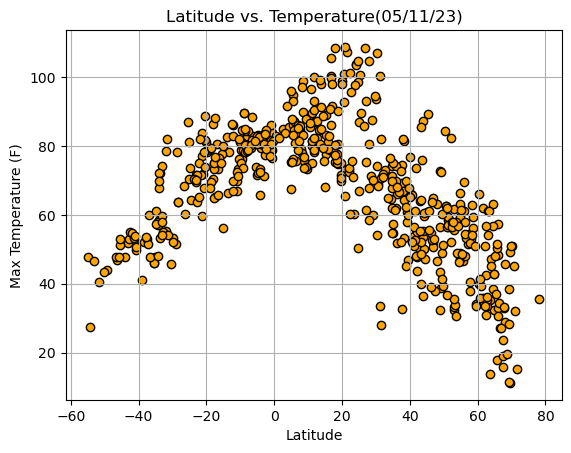

In [8]:
# Next, you'll create a series of scatter plots to showcase the following relationships:
# Latitude vs. Temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],facecolors ="orange", edgecolors ="black")
plt.title("Latitude vs. Temperature(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/Fig1.png")
plt.show()

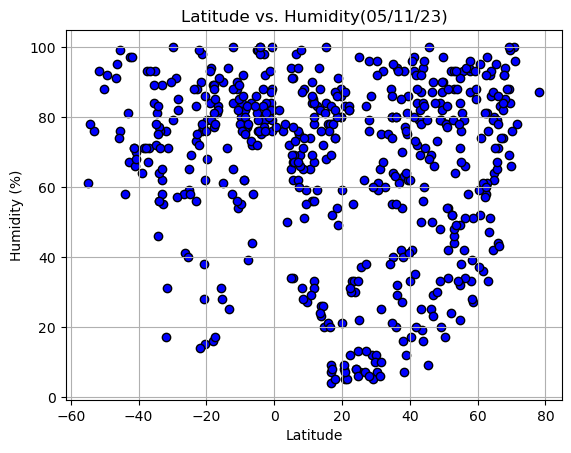

In [9]:
# Latitude vs. Humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],facecolors ="blue", edgecolors ="black")
plt.title("Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/Fig2.png")
plt.show()

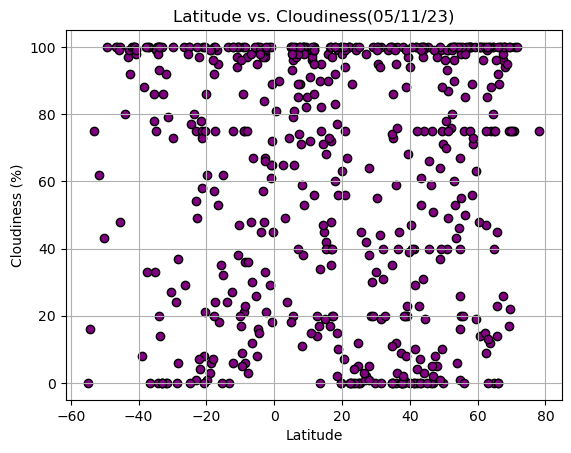

In [10]:
# Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],facecolors ="purple", edgecolors ="black")
plt.title("Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/Fig3.png")
plt.show()

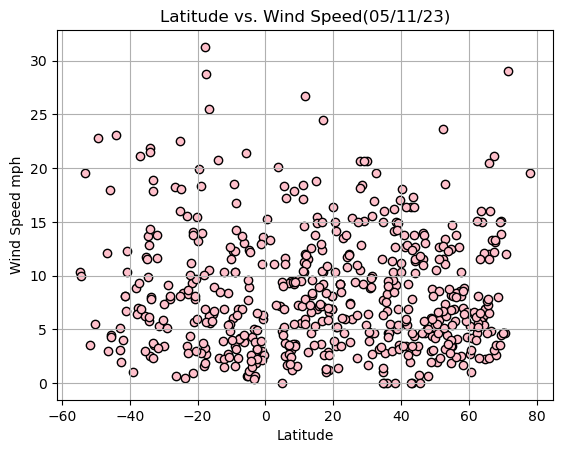

In [11]:
# Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],facecolors ="pink", edgecolors ="black")
plt.title("Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
plt.grid()
plt.savefig("../output_data/Fig4.png")
plt.show()

<h2 style = "font-family:'Arial Narrow';font-size:2.5rem;color:Darkgrey;">Requirement 2: Compute Linear Regression for Each Relationship</h2>

In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label="", y_label="", title=""):
    sns.regplot(x=x, y=y)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bafoulabe,13.8065,-10.8321,98.08,23,95,8.23,ML,1683799648
4,kavaratti,10.5669,72.6420,85.46,65,91,5.59,IN,1683799650
5,iskateley,67.6803,53.1512,32.94,92,100,13.13,RU,1683799650
9,melekeok village,7.4957,134.6367,84.51,69,89,3.09,PW,1683799652
10,albany,42.6001,-73.9662,50.52,79,23,1.99,US,1683799595


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,47.86,61,0,10.36,AR,1683799494
1,newnham,-41.3833,147.1333,52.75,71,100,8.05,AU,1683799647
3,yaren,-0.5472,166.9160,83.80,79,18,13.24,NR,1683799649
6,edinburgh of the seven seas,-37.0676,-12.3116,59.90,71,100,21.09,SH,1683799651
7,west island,-12.1568,96.8225,85.98,84,75,10.36,CC,1683799651


In [15]:
# You should create the following plots:
# Northern Hemisphere: Temperature vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression_plot(x_values,y_values, "Max Temp", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

NameError: name 'x_values' is not defined

NameError: name 'line_eq' is not defined

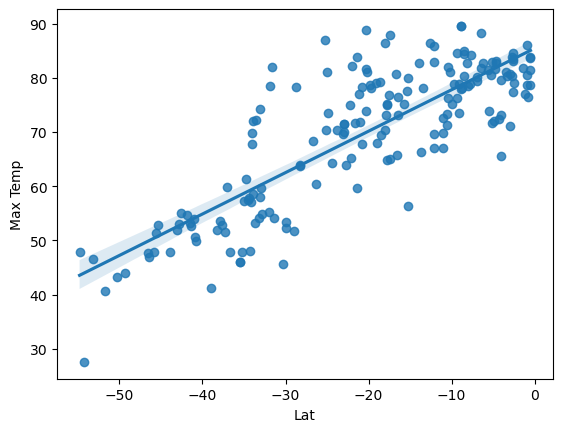

In [16]:
# Southern Hemisphere: Temperature vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression_plot(x_values,y_values, "Max Temp", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

NameError: name 'line_eq' is not defined

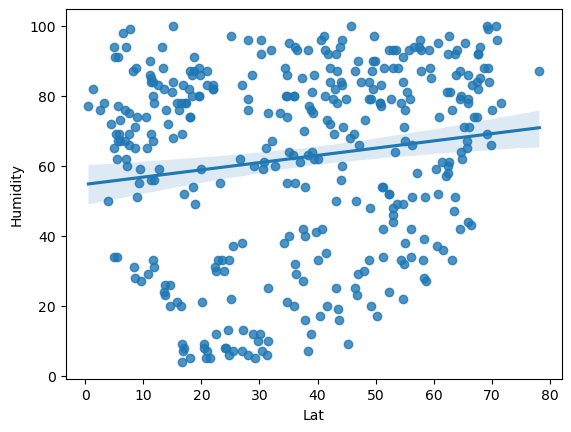

In [17]:
# Northern Hemisphere: Humidity vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

linear_regression_plot(x_values,y_values, "Humidity", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# Southern Hemisphere: Humidity vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regression_plot(x_values,y_values, "Humidity", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# Northern Hemisphere: Cloudiness vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regression_plot(x_values,y_values, "Cloudiness", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [ ]:
# Southern Hemisphere: Cloudiness vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression_plot(x_values,y_values, "Cloudiness", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# Northern Hemisphere: Wind Speed vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regression_plot(x_values,y_values, "Wind Speed", (40,60))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [ ]:
# Southern Hemisphere: Wind Speed vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression_plot(x_values,y_values, "Wind Speed", (70,80))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
print(f"The r-squared is: {rvalue**2}")
plt.show()